# Assignement for course ML2

Students: Tristan STAMPFLER and Thomas CARTA

## Table of contents

### 1) Exploration of the dataset
### 2) Data cleaning
### 3) Feature engineering
### 4) Feature selection
### 5) Metric definition
### 6) Various prediction models
### 7) Conclusion

## 1) Exploration of the dataset

Preliminary exploration of the dataset is necessary to determine which field we can use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/CreditTraining.csv")

In [3]:
df.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


In [4]:
df.describe()

,Id_Customer,Y,Number_Of_Dependant,Years_At_Residence,Years_At_Business,Nb_Of_Products
count,5380.000000,5380.000000,5378.000000,5380.000000,5378.000000,5380.000000
mean,4784.535688,0.073048,1.058572,12.626022,4.266270,1.089033
std,2781.436262,0.260240,1.339001,9.972164,7.225926,0.297587
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2368.500000,0.000000,0.000000,4.000000,1.000000,1.000000
50%,4762.500000,0.000000,0.000000,10.000000,1.000000,1.000000
75%,7180.250000,0.000000,2.000000,18.000000,4.000000,1.000000
max,9605.000000,1.000000,20.000000,70.000000,98.000000,3.000000


### Checking for NaNs

In [5]:
df.isna().sum()

Id_Customer               0
Y                         0
Customer_Type             0
BirthDate                 0
Customer_Open_Date        0
P_Client                  0
Educational_Level         0
Marital_Status            0
Number_Of_Dependant       2
Years_At_Residence        0
Net_Annual_Income         2
Years_At_Business         2
Prod_Sub_Category         0
Prod_Decision_Date        0
Source                    0
Type_Of_Residence         0
Nb_Of_Products            0
Prod_Closed_Date       4206
Prod_Category             0
dtype: int64

We can see have a lot of missing values for the field Prod_Closed_Date, and some for Number_Of_Dependant, Net_Annual_Income and Years_At_Business

### Checking if Id_Customer is an unique key

In [6]:
print(df[['Id_Customer']].nunique() == len(df))

Id_Customer    True
dtype: bool


Yes, Id_Customer is a unique key for this dataset

### Practising on marital

In [7]:
df_marital = df[['Id_Customer','Y','Marital_Status']]
df_marital['Marital_Status'].value_counts()

Married      4206
Single       1046
Widowed        64
Divorced       63
Separated       1
Name: Marital_Status, dtype: int64

In [8]:
marital_grp = df_marital.groupby('Marital_Status')
marital_grp['Y'].value_counts(normalize=True)

Marital_Status  Y
Divorced        0    0.920635
                1    0.079365
Married         0    0.930813
                1    0.069187
Separated       0    1.000000
Single          0    0.911090
                1    0.088910
Widowed         0    0.937500
                1    0.062500
Name: Y, dtype: float64

In [9]:
marital_grp.agg({'Y':'mean',
                 'Id_Customer':'count'})

,Y,Id_Customer
Marital_Status,,
Divorced,0.079365,63
Married,0.069187,4206
Separated,0.000000,1
Single,0.088910,1046
Widowed,0.062500,64


## 2) Data cleaning

We need to handle NaNs and select the columns we will use for our approaches

In [10]:
df.isna().sum()

Id_Customer               0
Y                         0
Customer_Type             0
BirthDate                 0
Customer_Open_Date        0
P_Client                  0
Educational_Level         0
Marital_Status            0
Number_Of_Dependant       2
Years_At_Residence        0
Net_Annual_Income         2
Years_At_Business         2
Prod_Sub_Category         0
Prod_Decision_Date        0
Source                    0
Type_Of_Residence         0
Nb_Of_Products            0
Prod_Closed_Date       4206
Prod_Category             0
dtype: int64

### Removing NaNs

We will remove NaNs in 2 ways. For Prod_Closed_Date there are too much values missing so we will just get rid of this field. For Number_Of_Dependant, Net_Annual_Income and Years_At_Business we just have a few values missing. Assuming the clients are iid, we can remove the rows with missing values.

In [11]:
df = df.drop("Prod_Closed_Date", axis=1)
df = df.dropna()

In [12]:
df = df.reset_index(drop=True)
df.isna().sum()
df.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,D


## Replace some object type with float

In [13]:
df['Net_Annual_Income'] = df['Net_Annual_Income'].str.replace(',','.').astype(float)

## 3) Feature engineering

We create some features from the fields we have in our dataset.
<br>
We compute here for instance the age of the client. We then get rid of obsolete fields.

In [14]:
df['Age'] = (pd.Timestamp('2020-01-01 00:00:00.000000') - pd.to_datetime(df['BirthDate'])).dt.days / 365.25
df = df.drop('BirthDate', axis=1)

## 4) Feature selection

We select all features

In [15]:
df.head()

,Id_Customer,Y,Customer_Type,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category,Age
0,7440,0,Non Existing Client,13/02/2012,NP_Client,University,Married,3.0,1,36.0,1.0,C,14/02/2012,Sales,Owned,1,B,42.483231
1,573,0,Existing Client,04/02/2009,P_Client,University,Married,0.0,12,18.0,2.0,C,30/06/2011,Sales,Parents,1,G,45.552361
2,9194,0,Non Existing Client,03/04/2012,NP_Client,University,Married,2.0,10,36.0,1.0,C,04/04/2012,Sales,Owned,1,B,46.475017
3,3016,1,Existing Client,25/08/2011,NP_Client,University,Married,3.0,3,36.0,1.0,C,07/09/2011,Sales,New rent,1,L,37.401780
4,6524,0,Non Existing Client,10/01/2012,NP_Client,University,Married,2.0,1,36.0,1.0,C,11/01/2012,Sales,Owned,1,D,66.370979


In [16]:
df.dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Category           object
Age                    float64
dtype: object

## 5) Metric definition

In [17]:
from IPython.display import Latex

In [18]:
df['Y'].mean()

0.07294380349832527

We need a consistent metric for our models to optimize. Since the dataset is heavily imbalanced (about 7.3% of 1 and 92.7% of 0) the accuracy is not by itself so relevant. Indeed a predictor that always predict 0 could get a 92.7% accuracy on this dataset). Furthermore, misclassifying a credit default as 0 is far more costly than misclassifying a credit that will be repaid as 1. But for the bank to earn some money we cannot reject all credit applications either.

We choose a target metric that maximizes the bank's profit per capita. We claim that this metric is:
<br>
<br>
\begin{equation}
\text{metric} = (1-\alpha) i \times \text{true_negative_rate} + \alpha \times \text{true_positive_rate} - \alpha
\end{equation}

With $i$ the annual interest rate and $\alpha$ the proportion credit default among all credits.

__Demonstration__: <br>
We firstly assume that the rows in the dataset are realisations of iid distributed variables reprensenting the population. We then assume that the bank only lends money for a one year period with no monthly payment and always lend the same amount. So after one year, either the bank gets back its money plus $i$ of interests or it faces a credit default and lost all of its money. 
<br>
So if the bank uses a prediction algorithm to decide wether or not to give a credit to a customer and follows strictly the algorithm predictions, its total profit (normalized by the amount of the credit) on the population is:
\begin{equation}
\text{total profit} = i* TN - FN
\end{equation}

Where we note $n$ the total number of individuals, $TP$ the number of true positives, $FP$ the number of false positives, $TN$ the number of true negatives and $FN$ the number of false negatives. According to our modelisation we have the following properties:
<br>
<br>
\begin{equation}
n = TP + FP + TN + FN \; \text{(1)} \text{,}\;\;\;\;\; TP + FN = \alpha n \; \text{(2)} \;\;\; \text{and}\;\;\; TN + FP = (1-\alpha)n \; \text{(3)}
\end{equation}

We can next rewrite the total profit using (1): $\text{total profit} = i*TN - n + TN + FP + TP$.
<br>
If we set our metric to be the profit per capita (including all individuals) we get:
<br>
<br>
\begin{equation}
\text{metric} = \text{profit per capita} \\
= \frac{\text{total profit}}{n} \\
= i*\frac{TN}{n} - 1 + \frac{TN + FP}{n} + \frac{TP}{n} \\
= (1-\alpha)i*\frac{TN}{TN+FP} -1 + (1-\alpha)\frac{TN+FP}{TN+FP} + \alpha\frac{TP}{TP+FN} \;\;\; \text{using (2) and (3)} \\
= (1-\alpha)i*\text{true negative rate} + \alpha*\text{true positive rate} - \alpha
\end{equation}
Which is exactly the metric stated above. <br>
__End of demonstration__

For the rest of the exercise, we set $i=5\%$ for the annual interest rate and we estimate $\alpha$ with the dataset.

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
def metric(y, y_pred, i=0.05):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    n = y_pred.size
    alpha = (tp+fn)/n
    metric = (1-alpha)*i*(tn/(tn+fp))+alpha*(tp/(tp+fn)) - alpha
    return metric

## 6) Various prediction models

### a) Logistic regression on quantitative variables

We try out Logistic regression on the quantitative variables

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

We split the data between a train set and a test. We use the train set to train the algorithm and to tune hyperparameters, and we use the test set to evaluate the algorithm performance.

In [22]:
quant_cols = ['Number_Of_Dependant','Years_At_Residence','Net_Annual_Income','Years_At_Business','Nb_Of_Products','Age']
X = df.loc[:,quant_cols]
Y = df.loc[:,'Y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=False)
recall = recall_score(y_test, y_pred, zero_division=False)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}')

metric:-0.02716279069767441
accuracy:0.9265116279069767, 1-mean_Y:0.9265116279069767, precision:0.0, recall:0.0


As we can notice here, Y_pred is all zeros. The logistic regression has learned to predict only the majority class: 0. As the metric shows, with such prediction algorithm the bank is loosing money.
<br>
We can fix it with weighting the classes in the loss. 
<br>
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

In [24]:
clf_balanced = LogisticRegression(class_weight='balanced')
clf_balanced.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = clf_balanced.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}')

metric:-0.008697674418604653
accuracy:0.5093023255813953, 1-mean_Y:0.9265116279069767, precision:0.0827906976744186, recall:0.5632911392405063


What we lost in accuracy we gained in recall, more credit default are being detected by the logistic regression. From now on we will use balanced loss for logistic regression. But the bank is still loosing money, we have to improve our model.

### b) Logistic regression on qualitative variables

We use one-hot encoder to encode class variables so we can use them as well for the logistic regression. We will use OneHotEncoder from sklearn.preprocessing for this task.

In [26]:
from sklearn.preprocessing import OneHotEncoder

#### Demo with marital status

In [27]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X = ohe.fit_transform(df[['Marital_Status']])
X

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [28]:
ohe.get_feature_names()

array(['x0_Divorced', 'x0_Married', 'x0_Separated', 'x0_Single',
       'x0_Widowed'], dtype=object)

In [29]:
clf = LogisticRegression(class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}')

metric:-0.017186046511627903
accuracy:0.7637209302325582, 1-mean_Y:0.9265116279069767, precision:0.09490740740740741, recall:0.25949367088607594


#### We can encode all strings columns

In [31]:
df.dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Category           object
Age                    float64
dtype: object

In [32]:
string_cols = ['Customer_Type', 'P_Client', 'Educational_Level', 'Marital_Status', 'Prod_Sub_Category', 'Source', 'Type_Of_Residence', 'Prod_Category']
X = ohe.fit_transform(df[string_cols])
X.shape

(5374, 36)

In [33]:
clf = LogisticRegression(class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
clf.fit(X_train, y_train)

C:\Users\Tristan\Anaconda3\envs\ML2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}')

metric:-0.004860465116279064
accuracy:0.7893023255813953, 1-mean_Y:0.9265116279069767, precision:0.15456674473067916, recall:0.4177215189873418


### c) Logistic regression on all variables

We can concatenate the encoding of class variables to quantitative variables

In [35]:
X_quantitative = df.loc[:,quant_cols]
X_class = ohe.fit_transform(df[string_cols])
print(X_quantitative.shape, X_class.shape)
X = np.concatenate((X_quantitative,X_class), axis=1)
print(X.shape)

(5374, 6) (5374, 36)
(5374, 42)


In [36]:
clf = LogisticRegression(class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
clf.fit(X_train, y_train)

C:\Users\Tristan\Anaconda3\envs\ML2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}')

metric:-0.004930232558139527
accuracy:0.6995348837209302, 1-mean_Y:0.9265116279069767, precision:0.11875, recall:0.4810126582278481


### c-bis) Adjusting the threshold for the decision to achieve optimal metric

We can plot the ROC curve thanks to adjusments made to the threshold for decision. Indeed logistic regression gives a number between 0 and 1 representing the probability of the sample beeing positive. We can then play on the decision boundary to increase our True Positive Rate or to increase our True Negative Rate.

In [38]:
from sklearn.metrics import roc_curve

In [39]:
y_pred_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

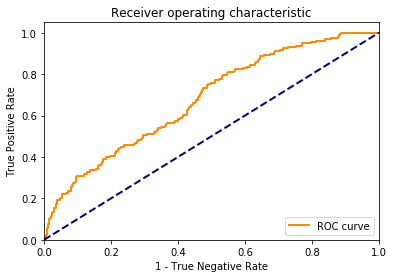

In [40]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - True Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Note: $\;\; \text{False Positive Rate} = 1 - \text{True Negative Rate}$

Finally we can look for the best metric across all thresholds (but we select it only using the train set):

In [41]:
y_pred_score = clf.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_score)

In [42]:
metric_best = -1
threshold_best = 0
for threshold in thresholds:
    y_pred =  (clf.predict_proba(X_train)[:,1] >= threshold).astype(int)
    metric_score = metric(y_train, y_pred)
    if metric_score >= metric_best:
        metric_best = metric_score
        threshold_best = threshold
        

print(f'metric_best_train:{metric_best}, threshold_best:{threshold_best}')

metric_best_train:0.009661910669975196, threshold_best:0.35908383268164146


__Conclusion for Logistic Regression__:
<br>
The optimal threshold to reject a credit application is about 0.36, which is lower than the default threshold of 0.5. Indeed, as stated in the beginning, misclassiying a credit default is more costly compared to misclasfying a credit that will be repaid. Our best logistic regression algorithm has the following metrics scores.

In [43]:
y_pred = (clf.predict_proba(X_test)[:,1] >= threshold_best).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}')

metric:0.007627906976744189
accuracy:0.3851162790697674, 1-mean_Y:0.9265116279069767, precision:0.09695290858725762, recall:0.8860759493670886


As we can notice, an high recall is necessary (despite a low precision) to maximise the bank's profits. This comes with a fairly low accuracy because the bank has to be very cautious of credit default. In a further study, we could vary the interest rate $i$, which was set to $5\%$ here, and observe how the metrics for the best algorithm would repond to it.
<br> As $i$ increases, we would probably see the recall going down and the accuracy and the precision go up, as paid-back credits become more lucrative.

### d) Tree classification

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance
import matplotlib.pyplot as plt


We first compute a tree with general parameters then print the importance of features 

metric:-0.02187499999999999
accuracy:0.9241071428571429, 1-mean_Y:0.9248511904761905, precision:0.47619047619047616, recall:0.09900990099009901


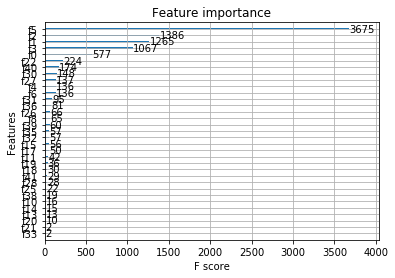

In [45]:
X = np.concatenate((X_quantitative,X_class), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}')

# plot feature importance
plot_importance(model)
#to_graphviz(model)
plt.show()

The quantitave figures (f0 to f5) are the most important features, the age is overall the most important one. The important disparity among the weights of the features entices us to elastic net penalisation $J(\beta)=(1-\alpha) || \beta ||^{2} +\alpha || \beta||_{1}$ to get rid of not important features.

metric:-0.028385416666666663
accuracy:0.9211309523809523, 1-mean_Y:0.9248511904761905, precision:0.14285714285714285, recall:0.009900990099009901


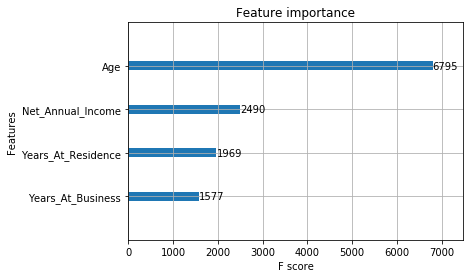

In [46]:
X = df.loc[:,quant_cols]
X = X.loc[:,['Age','Net_Annual_Income','Years_At_Residence','Years_At_Business']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=10, reg_alpha=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}')

# plot feature importance
plot_importance(model)

plt.show()

If we exclude the threshold for the classification we have 4 parameters to optimize:

the learning rate $lr \in [0.01, 0.09]$, 

the number of estimators $  \in [\![500;1500]\!]  $,

the coefficient $\alpha$ for the L1 regularisation in the elastic net $ \in ]0,1[$, 

the depth of the tree $ \in [\![4;8]\!]   $

The vast state space to explore prevent us to use exhaustive search of the best hyperparameters, we use stochastic research instead refering  to the paper ()

In [47]:
ar=np.arange(0.01,0.09,0.0005)

X = np.concatenate((X_quantitative,X_class), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

scale_pos_weight=y_train.size/y_train.sum()

m_lr = -1
m_n_estimators = -1
m_max_depth = -1
m_L1 = -1 
max_metric=0

thresholds_tree = np.arange(10**(-4),10**(-2),10**(-5))
print('done')
n_step=50 
for j in range(n_step):
    
    #paramètres
    lr = np.random.choice(ar)
    n_estim = np.random.randint(500,1500)
    m_depth = np.random.randint(4,8)
    L1 = np.random.choice([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    
    model = XGBClassifier(learning_rate = lr, n_estimators=n_estim, max_depth=m_depth, reg_alpha=L1,scale_pos_weight=scale_pos_weight,objective='multi:softprob',num_class=2)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_test)
    
    metric_best = -1
    threshold_best = 0
    for threshold in thresholds_tree:
       
        y_pred_tuning =  (y_pred[:,1] >= threshold).astype(int)
        metric_score = metric(y_test, y_pred_tuning)
        
        if metric_score >= metric_best:
            metric_best = metric_score
            threshold_best = threshold

    
    print("\r {:.2%} loading...".format(j/n_step), end="")
    if max_metric < metric_best:
        max_metric=metric_best
        m_lr = lr
        m_n_estimators =  n_estim
        m_max_depth = m_depth
        m_L1 = L1
        print(j)
        print(f'lr:{m_lr}, n_estimators:{m_n_estimators}, max_depth:{m_max_depth}, reg L1:{m_L1}, metric:{max_metric},threshold:{threshold_best}')


done
 0.00% loading...0
lr:0.06700000000000005, n_estimators:674, max_depth:5, reg L1:0.6, metric:0.005023255813953492,threshold:0.00612
 8.00% loading...4
lr:0.06900000000000005, n_estimators:1037, max_depth:5, reg L1:0.9, metric:0.005511627906976749,threshold:0.0056099999999999995
 12.00% loading...6
lr:0.026000000000000016, n_estimators:1225, max_depth:6, reg L1:0.8, metric:0.005906976744186054,threshold:0.006869999999999999
 98.00% loading...

If we test the select parameters on the test set we obtain:

In [48]:
print(f'lr:{m_lr}, n_estimators:{m_n_estimators}, max_depth:{m_max_depth}, reg L1:{m_L1}, metric:{max_metric},threshold:{threshold_best}')
model = XGBClassifier(learning_rate = m_lr, n_estimators=m_n_estimators, max_depth=m_max_depth, reg_alpha=m_L1,scale_pos_weight=100,objective='multi:softprob',num_class=2)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test) 
y_pred = (y_pred[:,1]>= threshold_best).astype(int)

metric_final = metric(y_test, y_pred)
print(metric_final) 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(Y)}, precision:{precision}, recall:{recall}')

lr:0.026000000000000016, n_estimators:1225, max_depth:6, reg L1:0.8, metric:0.005906976744186054,threshold:0.005399999999999999
0.005488372093023247
accuracy:0.28930232558139535, 1-mean_Y:0.9270561965016747, precision:0.08784596871239471, recall:0.9240506329113924


As in the logistic regression the chosen metric has for consequence to give a high importance to the recall at the expense of the precision

lr:0.026500000000000017, n_estimators:778, max_depth:7, reg L1:0.0, métrique:0.006674418604651164,threshold:0.005059999999999999
0.005976744186046518
accuracy:0.29023255813953486, 1-mean_Y:0.9270561965016747, precision:0.08844765342960288, recall:0.930379746835443

### Deep Learning

In [49]:
import tensorflow as tf
from tensorflow import keras

We build our neural network using sigmoid function for the activation and drop out layer to reduce overfitting, we also use a normalisation layer to have a continuum of values between zero and one and thus easily separate the results with a threshold 

In [50]:
model_deep = keras.Sequential([
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation= 'sigmoid')
])


In [51]:
model_deep.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',])


In [52]:
model_deep.fit(X_train,y_train, epochs=30)

Train on 3224 samples
Epoch 1/30
3224/3224 [==============================] - 1s 188us/sample - loss: 0.6351 - accuracy: 0.6600
Epoch 2/30
3224/3224 [==============================] - 0s 41us/sample - loss: 0.4930 - accuracy: 0.8666
Epoch 3/30
3224/3224 [==============================] - 0s 41us/sample - loss: 0.4184 - accuracy: 0.9237
Epoch 4/30
3224/3224 [==============================] - 0s 41us/sample - loss: 0.3989 - accuracy: 0.9265
Epoch 5/30
3224/3224 [==============================] - 0s 41us/sample - loss: 0.3924 - accuracy: 0.9274
Epoch 6/30
3224/3224 [==============================] - 0s 43us/sample - loss: 0.3899 - accuracy: 0.9274
Epoch 7/30
3224/3224 [==============================] - 0s 48us/sample - loss: 0.3881 - accuracy: 0.9274
Epoch 8/30
3224/3224 [==============================] - 0s 41us/sample - loss: 0.3879 - accuracy: 0.9274
Epoch 9/30
3224/3224 [==============================] - 0s 41us/sample - loss: 0.3873 - accuracy: 0.9271
Epoch 10/30
3224/3224 [=========

In [53]:
y_pred = model_deep.predict(X_train)
y_pred_tuning = y_pred

amax = np.amax(y_pred_tuning[:,1])
amin = np.amin(y_pred_tuning[:,1])
print(amin)
print(amax)

thresholds_deep = np.arange(amin,amax,10**(-7))

metric_best = -1
threshold_best = 0

for threshold in thresholds_deep:
    y_pred_tuning = y_pred
    y_pred_tuning =  (y_pred_tuning[:,1] >= threshold).astype(int)
    metric_score = metric(y_train, y_pred_tuning)
    
    if metric_score >= metric_best:
        metric_best = metric_score
        threshold_best = threshold
        
print(f'metric_best:{metric_best}, threshold_best:{threshold_best}')

4.844192e-06
0.00010473545


TypeError: 'numpy.float64' object is not callable

In [ ]:
y_pred = model_deep.predict(X_test)
y_pred =  (y_pred[:,1] >= threshold_best).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metric_score = metric(y_test, y_pred)
print(f'metric:{metric_score}')
print(f'accuracy:{accuracy}, 1-mean_Y:{1-np.average(y_test)}, precision:{precision}, recall:{recall}, threshold_best:{threshold_best}')

## 7) Conclusion

After preprocessing the data we tried various models and evaluated how each one performed on optimising the metric we defined for detecting credit default. After comparing them, we can conclude that our best model is ... with a metric score of ... (profit per capita/credit application).
<br>
Looking at other standard ML metrics for this best model, we have a precision of ... and a recall of .... The high recall and low precision highlight the necessity of finding the credit default as they are far more costly to the bank.